## **Some Graphs**

In order to understand a little bit the data that we have, we do some exploratory analysis.

In [1]:
## **LOAD PACKAGES**

import pandas as pd
import os
from datetime import datetime
import numpy as np

#Sometimes I will use R functions (those I believe are the best ones)
# Load in the r magic
%load_ext rpy2.ipython

## **R functions**

In [2]:
%%R 

#functions of R created by me and use it in this notebook: in Rgraphs.R - loaded before
bar_plot <- function(dataset, var, siz = 15){
    require(forcats)
    require(ggplot2)
    require(data.table)
    require(tidyquant)
    dataset_copy = copy(dataset)
    setnames(dataset_copy, var, 'var')
    d <- ggplot(dataset_copy, aes(fct_rev(fct_infreq(var)))) + geom_bar() + coord_flip()
    d <- d + ylab(var) + xlab('Frequency') 
    d <- d + theme_tq() 
    d <- d + theme(axis.title.y = element_text(size = rel(1.5)))
    d <- d + theme(axis.text.y = element_text(size = rel(1.8)))
    d <- d + theme(axis.text.x = element_text(size = rel(1.8)))
    d <- d + theme(axis.title.x = element_text(size = rel(1.5)))
    d <- d + theme(legend.text = element_text(size = siz))
    d <- d + theme(legend.title = element_text(size = siz))
    d <- d +  theme(
        panel.background = element_rect(fill="white") ,
        panel.grid.minor.y = element_line(size=3),
        panel.grid.major = element_line(colour = "lightgray"),
        plot.background = element_rect(fill="white")
      )

    d
    return(d)
}

In [3]:
#load treated and aggregated data
df = pd.read_csv('data/treated_data.csv') 

## **Variable: -Source-**

Here, it would be interesting group the categories to group those that are below a threshold

In [4]:
def clean_text(text):
    import re
    text = re.sub(r".com", "", text)
    text = re.sub(r".org", "", text)
    text = re.sub(r".net", "", text)
    text = re.sub(r".es", "", text)
    text = re.sub(r".io", "", text)
    text = re.sub(r".ru", "", text)
    text = re.sub(r".biz", "", text)
    text = re.sub(r"lm.", "", text)
    text = re.sub(r".ai", "", text)
    text = re.sub(r".pw", "", text)
    text = re.sub(r".edu", "", text)
    text = re.sub(r"keep.", "", text)
    text = re.sub(r"eu.", "", text)
    text = re.sub(r"es.", "", text)
    text = re.sub(r".ca", "", text)
    text = re.sub(r".au", "", text)
    text = re.sub(r"au.", "", text) #
    text = re.sub(r"m.", "", text) #
    text = re.sub(r"l.", "", text)
    text = re.sub(r".ch", "", text)
    text = re.sub(r".vk", "", text)
    text = re.sub(r"ps.", "", text)
    return text

df['Source'] = df['Source'].map(lambda x : clean_text(x))
df['Source'].tail()

9855        goog
9856    (direct)
9857    (direct)
9858        goog
9859      nkedin
Name: Source, dtype: object

R[write to console]: Loading required package: forcats

R[write to console]: Loading required package: ggplot2

R[write to console]: Loading required package: data.table

R[write to console]: Loading required package: tidyquant

R[write to console]: Loading required package: lubridate

R[write to console]: 
Attaching package: ‘lubridate’


R[write to console]: The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


R[write to console]: The following object is masked from ‘package:base’:

    date


R[write to console]: Loading required package: PerformanceAnalytics

R[write to console]: Loading required package: xts

R[write to console]: Loading required package: zoo

R[write to console]: 
Attaching package: ‘zoo’


R[write to console]: The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


R[write to console]: 
Attaching package: ‘xts’


R[write to console]: The fo

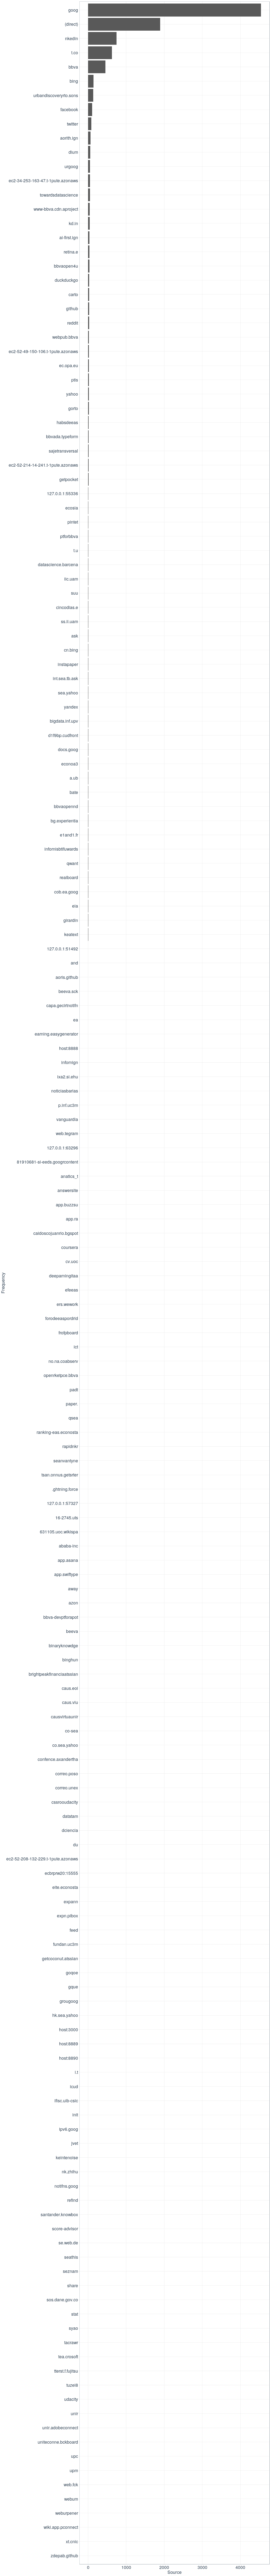

In [5]:
%%R -i df -w 1000 -h 9500 -u px
bar_plot(df, 'Source')

#### In the graph we observe several similar categories. 

## **fuzzywuzzy: string match similarities**
To check if thre are misspelling in the tags. This allows to see if there are similarities between categories.

There are other alternatives more realted with spelling like:

from textblob import TextBlob

df['Company'] = df['Company'].apply(lambda tweet: TextBlob(tweet).correct())

In [6]:
#check similarities between variables (do not forget eliminate duplicates)
from fuzzywuzzy import fuzz
import pandas as pd
import numpy as np

dataframecolumn = pd.DataFrame(df['Source'])
dataframecolumn.columns = ['Match']
compare = pd.DataFrame(df['Source'])
compare.columns = ['compare']
dataframecolumn['Key'] = 1
compare['Key'] = 1
print(compare.shape)

#we will take only the first 2000
compare = compare.iloc[:2000,:]
dataframecolumn = dataframecolumn.iloc[:2000,:]
combined_dataframe = dataframecolumn.merge(compare,on="Key",how="left")
combined_dataframe = combined_dataframe[~(combined_dataframe.Match==combined_dataframe.compare)]
def partial_match(x,y):
    return(fuzz.ratio(x,y))
print('Please wait: This will take a little bit ...')
partial_match_vector = np.vectorize(partial_match)
combined_dataframe['score']=partial_match_vector(combined_dataframe['Match'],combined_dataframe['compare'])
combined_dataframe = combined_dataframe[combined_dataframe.score>=80]

/home/erikapat/anaconda3/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


(9860, 2)
Please wait: This will take a little bit ...


In [7]:
pd.set_option('display.max_rows', 500)
combined_dataframe

Match  Key compare  score
8086     goog    1  urgoog     80
8880     goog    1  urgoog     80
8920     goog    1  urgoog     80
9033     goog    1  urgoog     80
9201     goog    1  urgoog     80
...       ...  ...     ...    ...
3987033  goog    1  urgoog     80
3987201  goog    1  urgoog     80
3987522  goog    1  urgoog     80
3987699  goog    1  urgoog     80
3987810  goog    1  urgoog     80

[14560 rows x 4 columns]

## **Country**


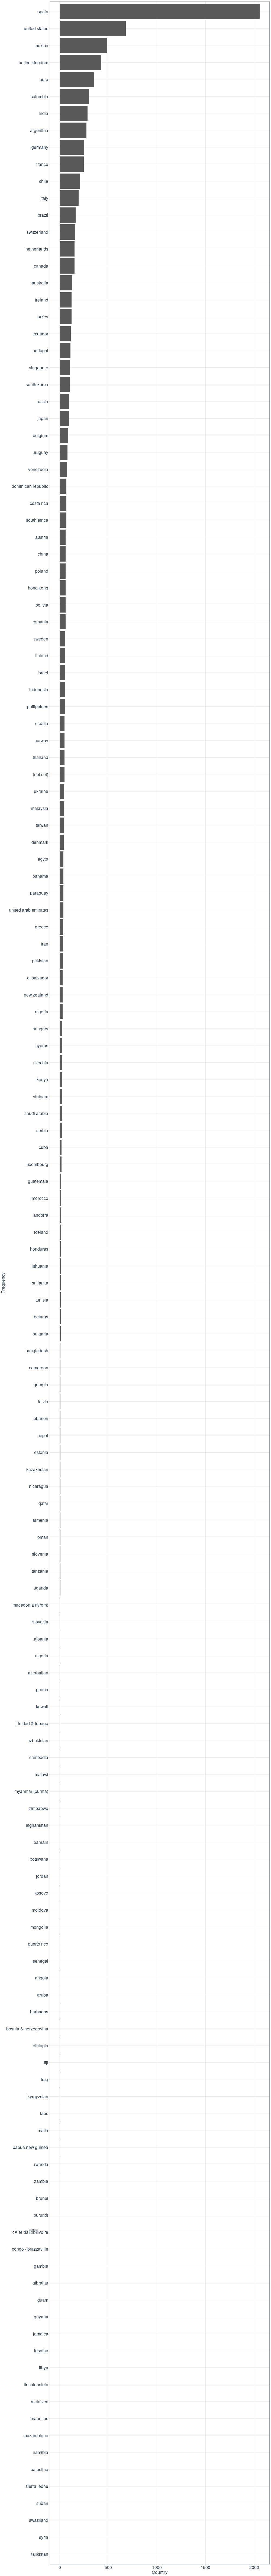

In [8]:
%%R -i df -w 1000 -h 9500 -u px
bar_plot(df, 'Country')

In [9]:
df['Device_Category'] = df['Device Category']

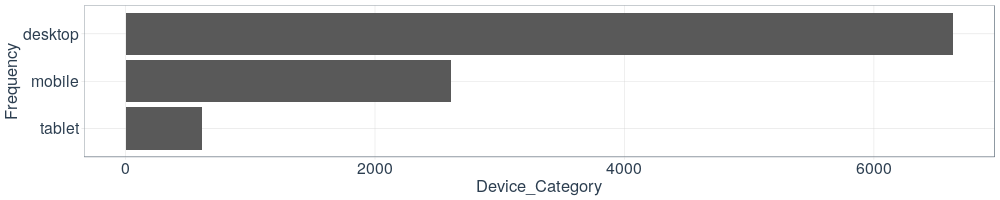

In [10]:
%%R -i df -w 1000 -h 200 -u px
bar_plot(df, 'Device_Category')

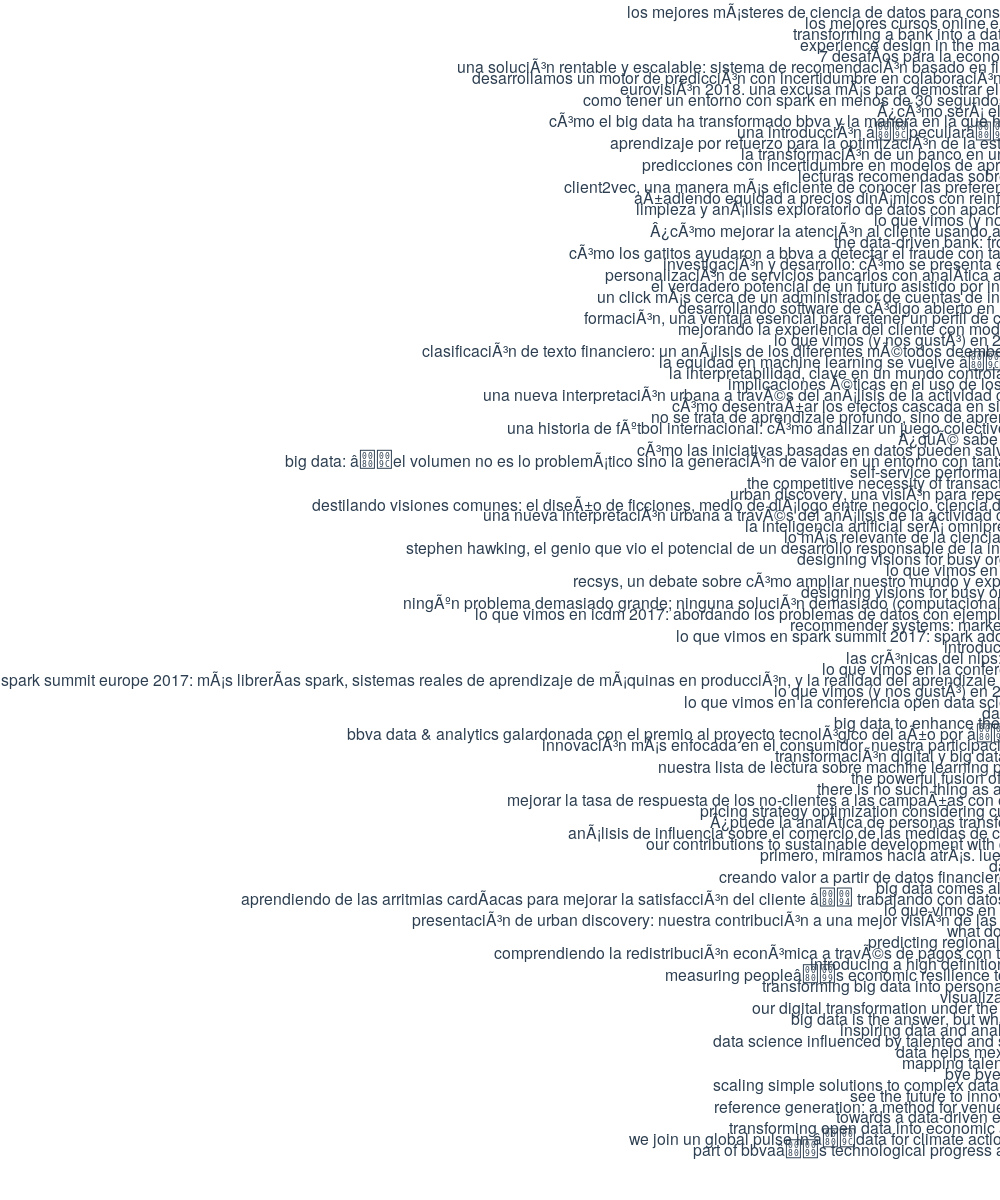

In [17]:
%%R -i df -w 1000 -h 1200 -u px
bar_plot(df, 'title', siz = 1)

In [30]:
dfh =df.groupby(['title'])['Page Title'].count().reset_index()
dfh.sort_values(by = 'Page Title', ascending=False).head()

title  Page Title
58  los mejores másteres de ciencia de datos para ...         506
57      los mejores cursos online en ciencia de datos         292
88    transforming a bank into a data-driven business         243
31      experience design in the machine learning era         241
0          7 desafíos para la economía global digital         226

### **'los mejores masteres de ciencia de datos para considerar este verano' is the post that appear more in the different social networks**

R[write to console]: Warning:
R[write to console]:  Ignoring unknown parameters: binwidth, bins, pad



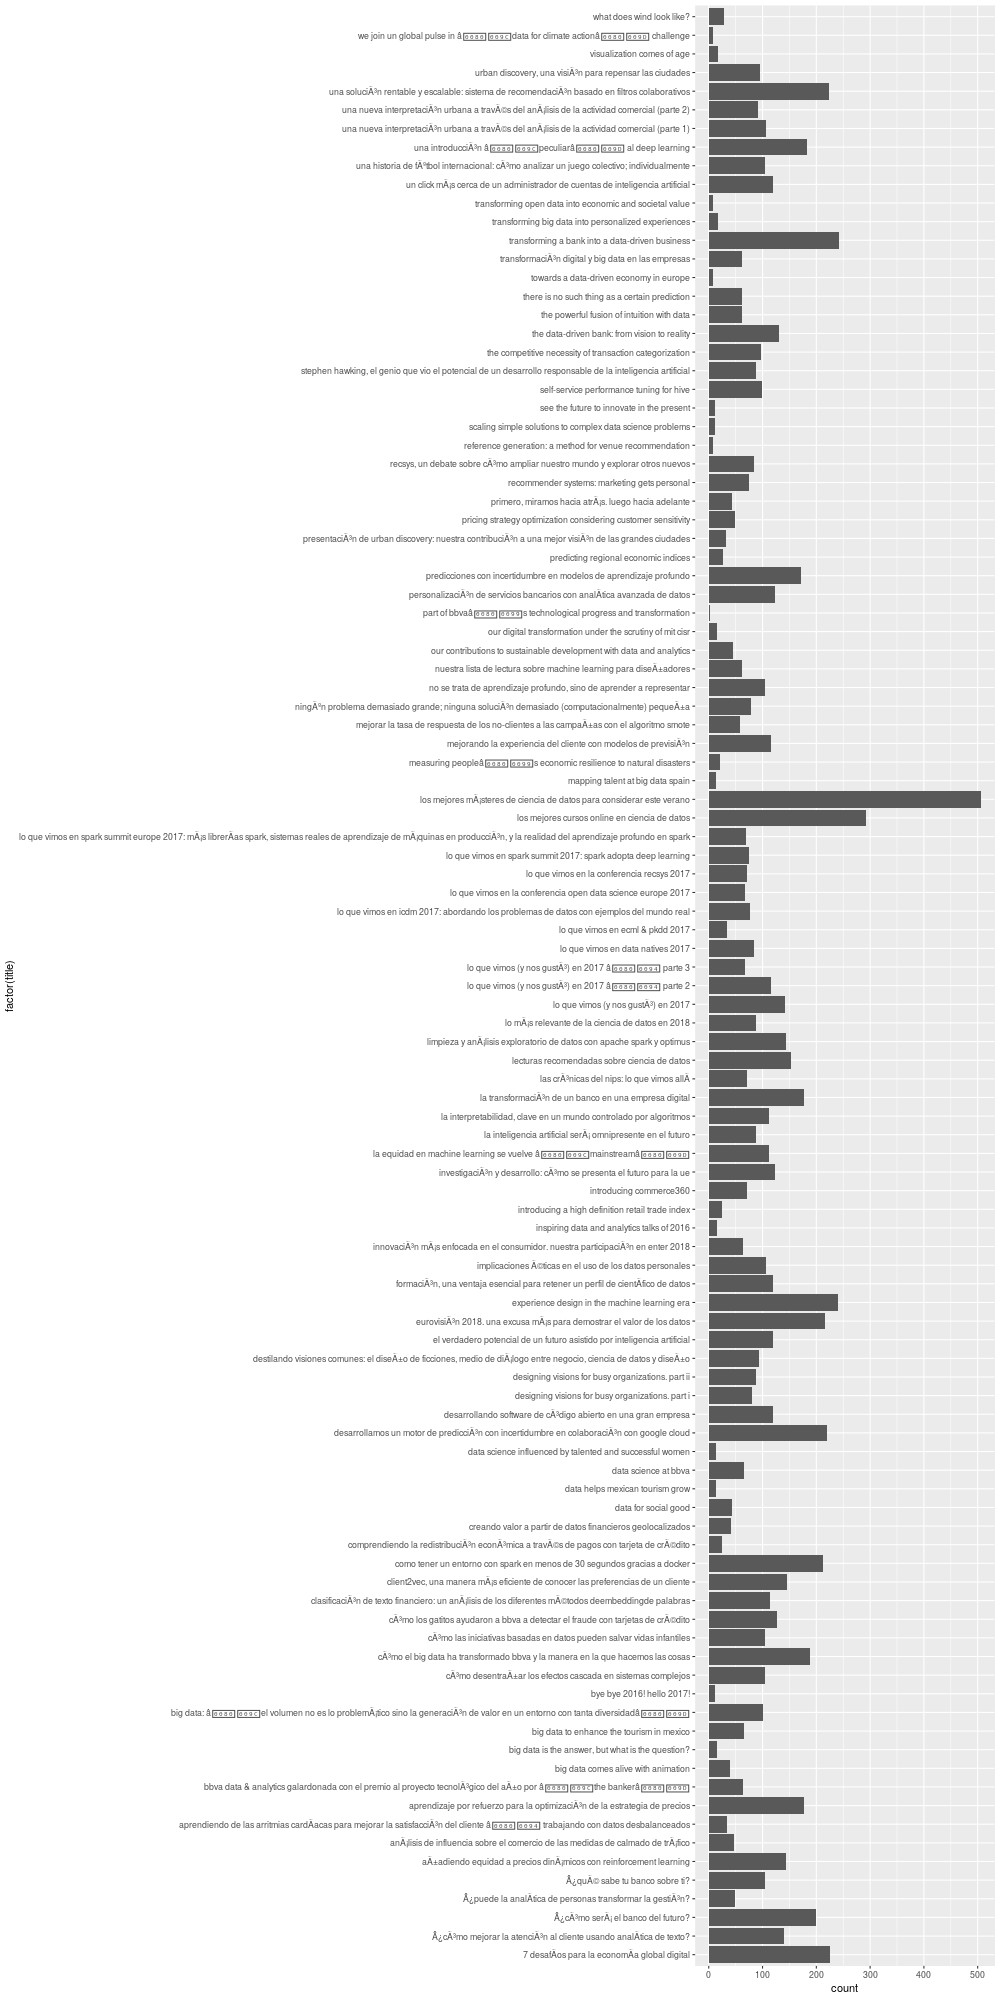

In [12]:
%%R -i df -w 1000 -h 2000 -u px
require(ggplot2)
require(dplyr)
g <- ggplot(df, aes(x = factor(title))) +  geom_histogram(stat="count") + coord_flip()  
g


## **Date**

There are data from Feb 2015 to Dic 2018, it is clear that not every day there is a post.

In [13]:
#df['date'] = pd.to_datetime(df['date'])

R[write to console]: Warning:
R[write to console]:  Ignoring unknown parameters: binwidth, bins, pad



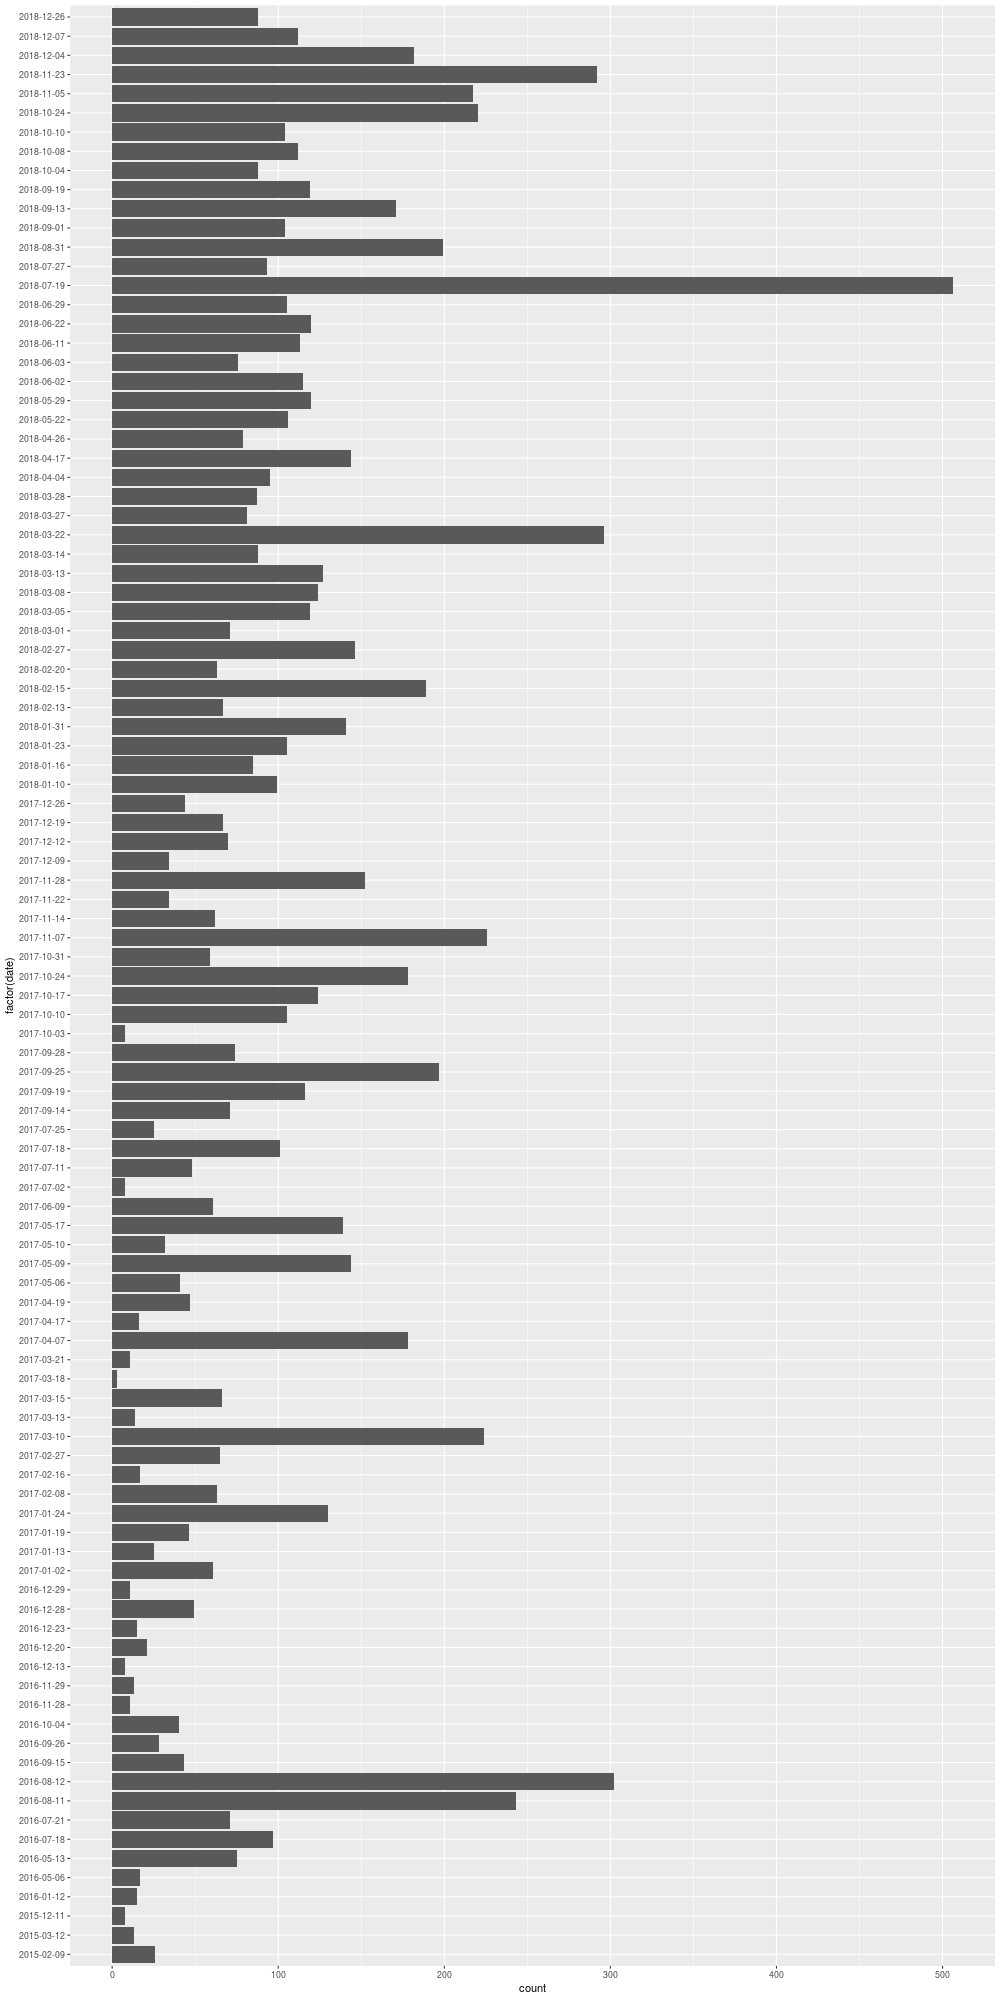

In [14]:
%%R -i df -w 1000 -h 2000 -u px
require(ggplot2)
require(dplyr)
g <- ggplot(df, aes(x = factor(date))) +  geom_histogram(stat="count") + coord_flip()  
g